# Load Librarys / install Librarys

In [7]:
# !pip install wordcloud

In [40]:
import numpy as np
import time
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import string
import unicodedata
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import nltk

# Load Data frame

In [10]:
df = pd.read_csv('DataSet/IMDB-Dataset-65k-movie-review.csv')

In [11]:
df.head()

,Ratings,Reviews,Movies,Resenhas
0,1.0,*Disclaimer: I only watched this movie as a co...,Disaster Movie,* Isenção de responsabilidade: eu só assisti e...
1,1.0,I am writing this in hopes that this gets put ...,Disaster Movie,Estou escrevendo isso na esperança de que isso...
2,1.0,"Really, I could write a scathing review of thi...",Disaster Movie,"Realmente, eu poderia escrever uma crítica con..."
3,1.0,If you saw the other previous spoof movies by ...,Disaster Movie,Se você viu os outros filmes falsificados ante...
4,1.0,This movie I saw a day early for free and I st...,Disaster Movie,Este filme eu vi um dia cedo de graça e ainda ...


In [12]:
print("Columns name: ", df.columns)

Columns name:  Index(['Ratings', 'Reviews', 'Movies', 'Resenhas'], dtype='object')


# Data cleaning process

In [13]:
from nltk.corpus import stopwords

### 1. maintain the stopwords

In [14]:
from nltk.corpus import stopwords
#Customize stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'was', 'doing', 'ma', 'through', 'again', 'y', 'once', 'but', 'having', 'while', 'each', "that'll", 'yourselves', 'these', 'here', 'hasn', 'few', 't', "wouldn't", 'or', 'between', "hasn't", 'were', "haven't", 'can', 'when', 'won', 'over', "won't", 'could', 'them', 'i', 's', 'her', 'they', 'o', 'are', 'has', 'isn', 'which', 'further', 'some', 'yours', 'don', 'his', 'after', 'it', 'on', "didn't", 've', 'myself', 'own', 'if', 'with', 'from', 'because', 'why', 'hers', 'into', 'out', 'our', 'before', 'shouldn', 'couldn', 'where', 'shan', 'me', 'ourselves', 'being', 'himself', 'ain', 'only', 'of', 'wasn', 'needn', 'off', 'this', 'itself', "hadn't", 're', 'and', 'those', "you'll", 'should', "shan't", 'for', 'below', 'nor', "you're", 'do', 'he', 'more', "it's", 'in', 'whom', 'most', 'd', 'be', 'both', 'under', 'the', 'down', 'then', 'did', 'against', 'to', "should've", 'him', 'ours', 'been', 'up', "shouldn't", 'who', 'is', 'same', "don't", 'other', 'such', 'above', 'theirs', 'will', 'too', 'a

### 2. data cleaning process

In [15]:
'''-----------------------------Data Cleaning and Preprocessing pipeline----------------------------------'''

#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content


In [16]:
df['Reviews_clean'] = df['Reviews'].apply(data_cleaning)

In [20]:
# remove all the extra text
print(df['Reviews_clean'][7])
print("\n")
print(df['Reviews'][7])

ok disastrous not imaginative barb movie not shred wit movie saw movie free friend said pissed pants trailer free passes think incontinent spoof disaster movies fun not couple disaster movies get referenced not really spoofed instead spoofing recent movies genres aspects current pop culture current women wrestling head commercials anything good minute running time get minutes nicole parker seems like good good material


OK, so "Disastrous" isn't an imaginative barb for this movie, but then there's not a shred of wit to the movie, so....I saw this movie for free. A friend who said he "pissed his pants" at the trailer had free passes. I think he's incontinent.A spoof of disaster movies might have been fun. This is not it. A couple disaster movies get referenced, not really spoofed. Instead, the "spoofing" is of recent movies of all genres, and of aspects of current pop-culture. Then again, how current is women's wrestling or the "Head On" commercials?If there's anything about it that's 

#  Check Missing Values

In [24]:
print(df.isna().sum())

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64


#  Describe Data frame and print unique reviews

In [33]:
print(df['Ratings'].describe())

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64


In [34]:
df['Reviews'].describe()

count                                                150000
unique                                               149780
top       Really the best animation that ever existed I ...
freq                                                      5
Name: Reviews, dtype: object

In [35]:
# number of unique rows present in the dataset
print("unique Reviews: ", df.Reviews_clean.nunique())
print("unique movie:", df.Movies.nunique())
print("unique Reviews: ", df.Reviews.nunique())
print("unique rating:", df.Ratings.count())

unique Reviews:  149753
unique movie: 14206
unique Reviews:  149780
unique rating: 150000


# Data visualization

1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: Ratings, dtype: int64


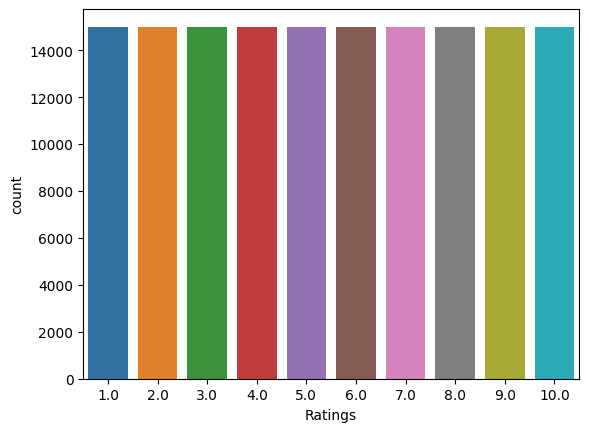

In [43]:
# rating distribution amoung all classes 
sns.countplot(x=df['Ratings'])
print(df['Ratings'].value_counts())

# Word Cloud / Visualization 

In [46]:
# use word cloud
sentences = df['Reviews_clean']
pos = ' '.join(map(str, sentences[df['Ratings']>=7]))
neg = ' '.join(map(str, sentences[df['Ratings']<=4]))

### 1. Positive review

(-0.5, 1499.5, 799.5, -0.5)

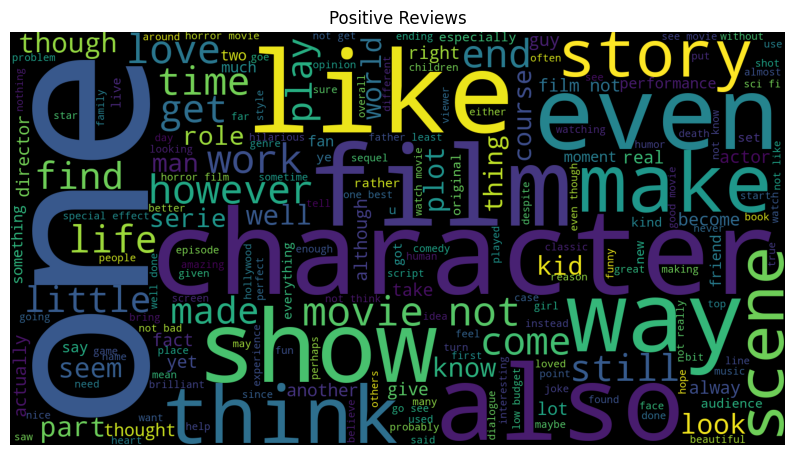

In [47]:
pos_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(pos) 

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

### Negative Review

(-0.5, 1499.5, 799.5, -0.5)

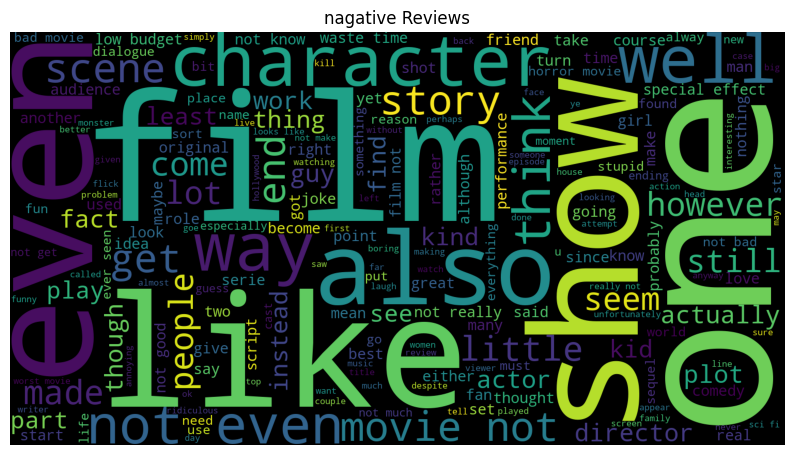

In [48]:
pos_wordcloud = WordCloud(
    width=1500, 
    height=800,
    background_color='black',
    stopwords= stop_words,
    min_font_size = 15
).generate(neg)

plt.figure(figsize = (10, 10))
plt.imshow(pos_wordcloud)
plt.title('nagative Reviews')
plt.axis('off')

### 3. number of charactor in reviews


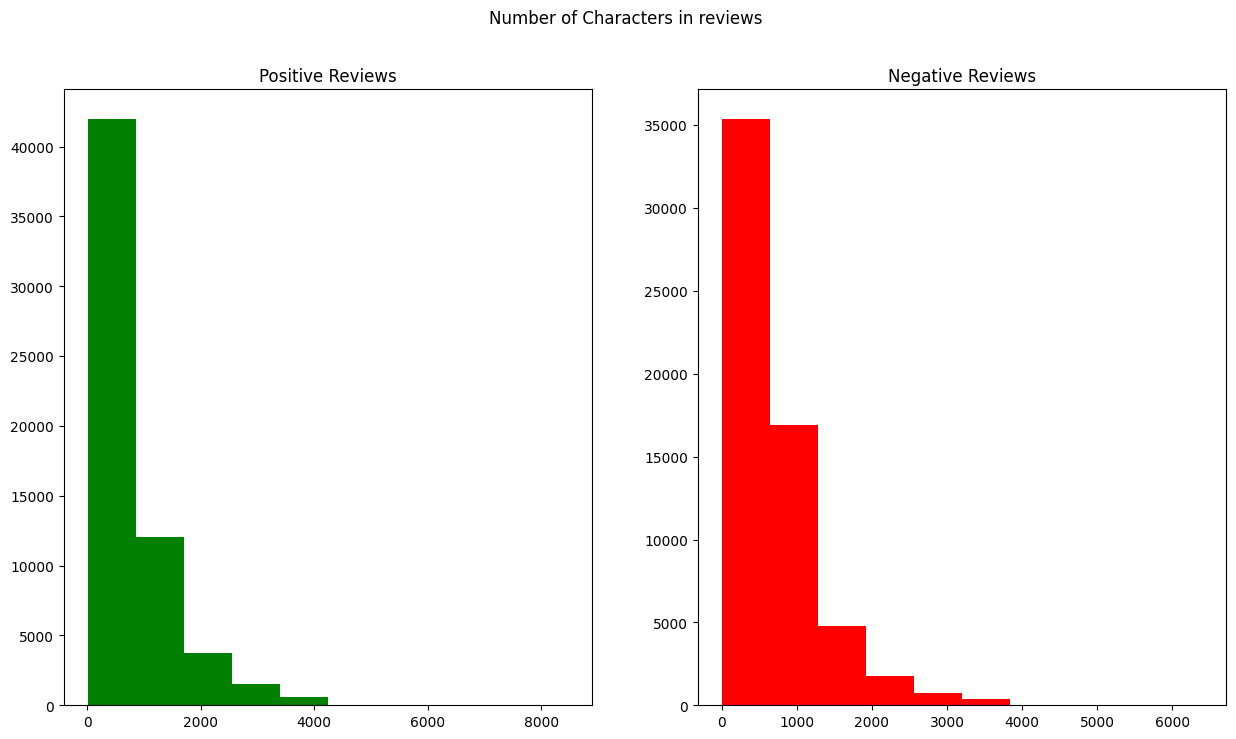

In [50]:
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Ratings']>=7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.show()

### 4. Visulaize average of words in reviews

Text(0.5, 0.98, 'Average word length in Reviews')

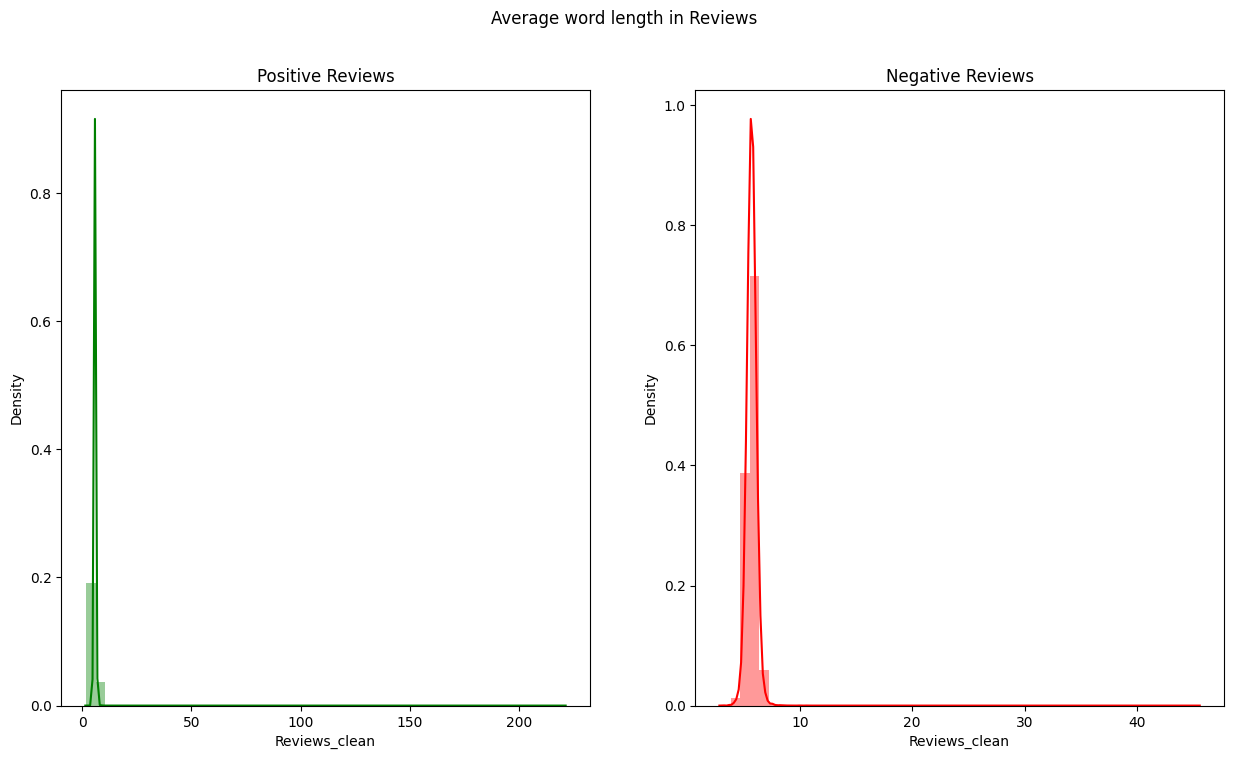

In [51]:
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in Reviews')

# Ngrams

## Positve N-grams

In [53]:
#Get important feature by using Countvectorizer
# ngrams: trandas of multiple words together
#  g -> engrams
# n -> numbers
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     create the sparce vectore respect to VOC. size
    return words_freq[:n]

### 1. Unigram

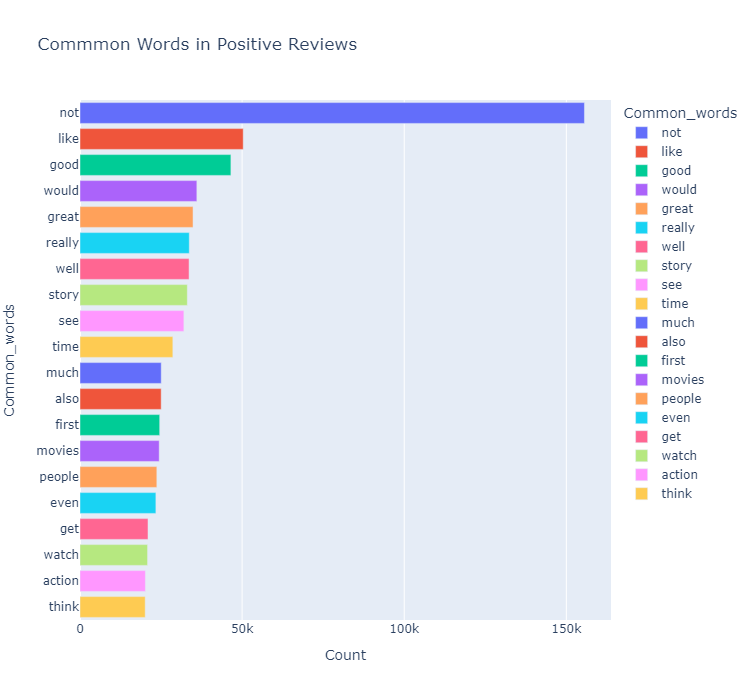

In [108]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### 2. Bigram

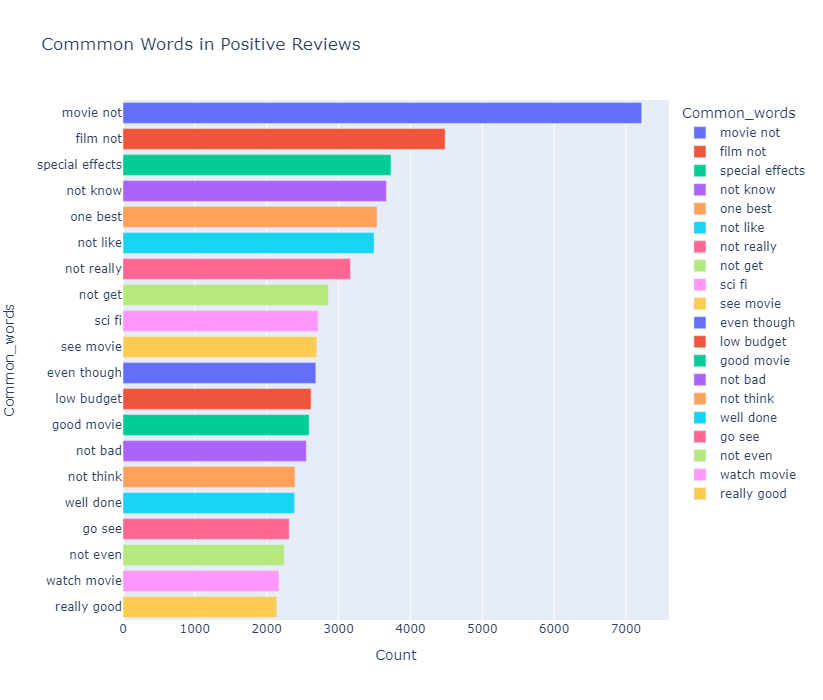

In [55]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### 3. Trigram

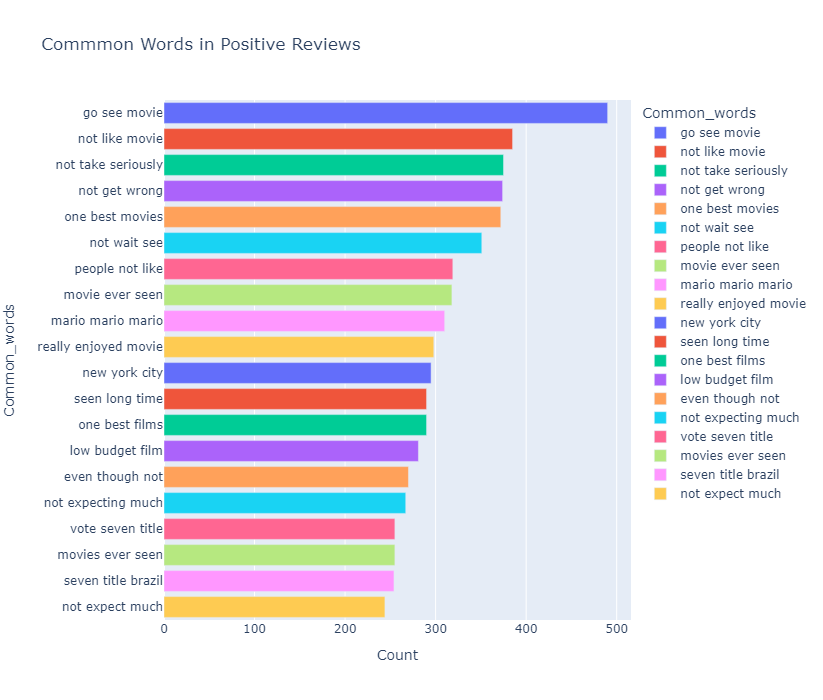

In [56]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [58]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("not like| not want| not big fan"))].head(5)

,Reviews,Ratings,Movies
90193,"Starring: Carmen Electra and Brooke Hogan.Scary fish story that really has a lot going for it – Scares,Girls in bikinis and a creature that is NEW ! So let's go out to sea and study,No not like ""The Suite Life On Deck"",But more like Fred Olen Ray 'Showtime' movies in the water.There are villains without fins and people with Brains & Boobs.The creature effects are really good looking as CGI and just fun when do in real time and on set with actors interacting with the teeth plus.This ATOLL set would make a great tourist attraction with a re-tooled 'BRUCE the shark' that was replaced at Universal Studios,Florida.",7.0,2-Headed Shark Attack
90198,"Some folks really downgraded this movie and the two main stars, Casper Van Dien and Elelnia Eliniak by stating their careers were over because of this movie. Come on folks these two are professional actors and know how to act. This movie was not as horrible as some would have us believe nor did their careers end. Just because one did not like the movie is no reason to slam dunk the actors. The movie was actually quite good because of the two main stars It's quite conceivable for a character named Van Helsing not to know at one time in earths ancient culture he had a relative who was a vampire killer. As far as the script it was okay, the cinematography was good as far as one can be from being inside a spacecraft. The vampires exhibited great strength and stealth. They were tall dark and handsome or beautiful and tempting. In the end all the vampires were slain at the expense of most of the crew. To see which vampire remains and which crew members remain and how the movie ends which...",7.0,Dracula 3000
90222,"Alone in the Dark 2 is a fun little Supernatural Thriller with a good little cast & i enjoyed it, it looks like a movie & was actually filmed on film which was very rare back then, & even more rare now it's almost extinct, it's all digital now only ""Tarantino"" still uses film that I've heard of!!!\nAlso the film looks very good with good use of colour & a very slick look with lots of blue & green, a very cool opening actually with a view of new york city & central park, then we go down to central park where we meet 3 witch hunters running from the old Hag, it's very cool.\nThe first film was just ok, not great but not as terrible as all those way over the top reviews destroying it was saying, as there's alot of much worse films out there!!!\nThe music is really good, it's eerie & full of suspense & this little B-movie actually has a strong creepy atmosphere & feels like one of those rare Horror gems you find on t.v in the middle of the night, good solid film.""Alone in the Dark 2"" r...",7.0,Alone in the Dark II
90251,"You have to understand with these kinds of movies (boa vs. python,frankenfish, sasquatch hunters, rottweiler, tower of blood), you are not going to like it. You are going to think it was soo bad it was hilarious. Most importantly you cannot take it seriously as a movie. You have to also watch it with friends so you can all yell and say how stupid something was, or call something that is about to happen. I have seen about 8 movies like this one and I did not like one, but I had an amusing time watching it. WARNING: If you are looking for a scary movie or an interesting suspenseful movie DO NOT WATCH THIS! If you are on the other hand seeing something with friends, and you cant find a good comedy watch one of these. If you pick this movie out because you thought it would be cool, you should have been eliminated from the gene pool years ago. My personal favorite out of these 5 is sasquatch hunters, it was beyond helpless.",7.0,Boa vs. Python
90287,"OK, let's look past the fact that the director, Christina Peters (aka Kat Slater), went on to direct a profusion of pulsating porn including, but not limited to, ""Young Sluts, Inc."" 1 thru 15 and ""Cum Swappers"" 1 thru 4.Let's look past the fact that basically every review is slamming this

### 4. quadgraph

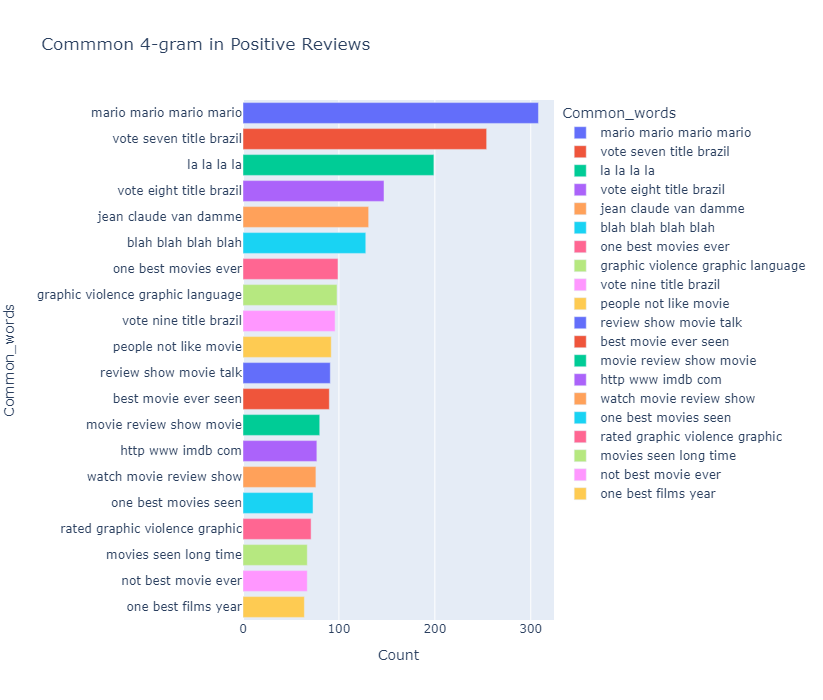

In [59]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 4-gram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### 5. Fivegram

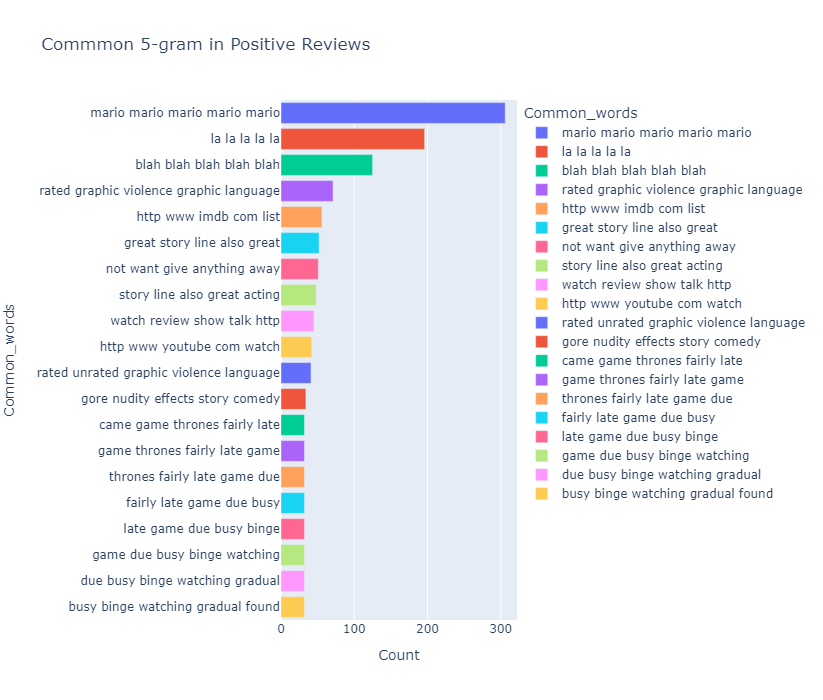

In [119]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [60]:
# which word contain the "laalalalalalalal,blahblahblahblahblablahblahbalah"
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews'].str.contains("blah blah blah| la la la la| mario mario mario mario"))].head()

,Reviews,Ratings,Movies
571,"Well I wasn't sure what language this film was made in - so I put it through Babel Fish. Here is a typical line translated:'Blah blah blah..blah blah blah blah, blah de blah'.This actually makes more sense than the lines the actors were uttering.Effects wise I spotted left over props from Voyage to the bottom of the Sea (Think Giant squids and Fish Men)Best line (from a cigar smoking middle aged Man to a 9 year old) 'This World's become a place where boys like you and me have to grow up fast' (he looks at least 50 for God's sake)This film makes a previous SyFy effort (Savage planet - about alien killer bears) look like a masterpiece.Great going guys :)",1.0,War of the Worlds 2: The Next Wave
1070,"No, it doesn't. This is the WORST show. If you can even call it that, on the internet. Don't worry, I am not that kind of guy who bashes on kids for making videos, usually they're actually as good as work done by adults, just maybe the voices are different. But not here. Once you watch just one of his videos you immediately hate Lucas, the infamous maker of ""Fred"", and plays as him. You don't care about his personal life or ANYTHING, all you want and need to do is tell him off. He got MOST subscribed on You Tube for months on end, and he does NOT deserve that badge. I wouldn't mind if he were an O.K actor but, he just... let me explain. A Fred video in a nutshell... ""Blah blah blah blah blah O.M.G Judy ha i am so not funny blah blah blah pointless yelling wow look Kevin blah blah blah mom comes home and says something unfunny, blah blah blah, subscribe. To the person who just wasted your time and gave you partial deafness in your ears."" All that and some high pitching easily done i...",1.0,Fred
3534,"This is truly a horrid movie. But (maybe..) worth watching once because it's an instant, modern camp classic.Now, if you notice, I only submit bad reviews to this site, but that's because bad movies are a hobby of sorts for me. I'm one who thinks you can learn more about film from bad movies than good ones, and if there is any thuth to that, every film student's thesis should be written about Battlefield Earth.You don't just wonder what they were thinking. You're amazed that so many people had to be so incompetent for this movie to get released. It defies comprehension. They had the budget, some (well, ok.. ) 'capable' (servicable might be a better term) actors.. so how could any outfit fail so miseraby?It's an amazing film in all the ways that it sucks. It combines all the elements of a horrid film - employs characters which don't develop in any way, that you don't care about (or even root against), who act in very irrational or excessively stupid ways for the purpose of lengtheni...",1.0,Battlefield Earth
3970,"I love the IMDb but I've noticed a very sad trend... seems like users here feel they have to defend truly terrible movies. Just look at the user reviews for ""Hudson Hawk"" or ""Ishtar"" and you'll see titles like ""Not As Bad As They Say,"" ""Under-Rated Classic,"" and the offensive ""I LOVE This Movie.""Grow up! It's not a good idea to rescue trash cinema from the dumpster. Let's be adults and let films like ""Leonard, Part 6"" get the treatment they deserve. And oh how this film deserves a lot of treatment... ""Leonard"" is a movie with no redeeming value. Bill Cosby stars as a secret agent who has to save the world from an evil woman who blah blah blah... why bother? The movie tries to be an action film while simultaneously spoofing action films. (Schwarzenegger would later fail at this with the nauseating ""Last Action Hero"") What we're left with is a mess of a movie and Cosby- one of the all-time great comedians- can't even get one genuine laugh out of the deal. I have a passion for bad mov...",1.0,Leonard Part 6
4538,"Forget Manos, this is without a doubt the worst movie EVER MADE! The incredibly dull monster, bad dubbing, bad acting, annoying narration and lack of narration during parts 

## Negative N-grams

### 1. Unigram

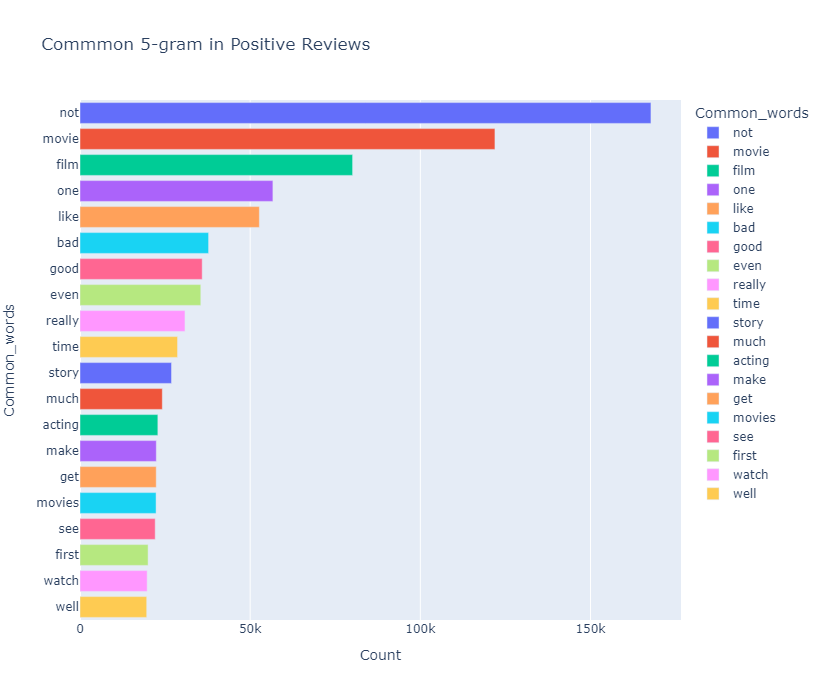

In [61]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### 2. Bygram

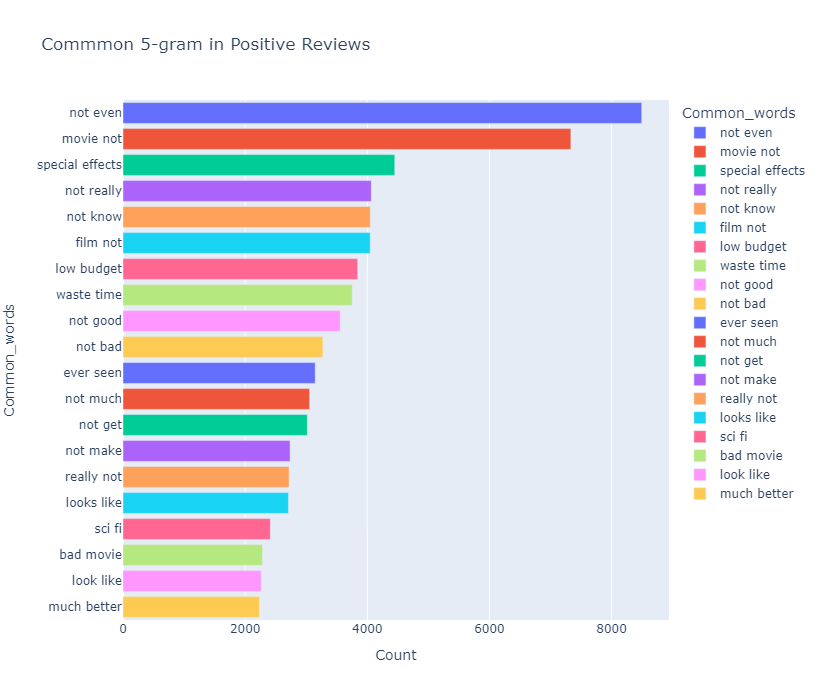

In [62]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### 3. Trigram

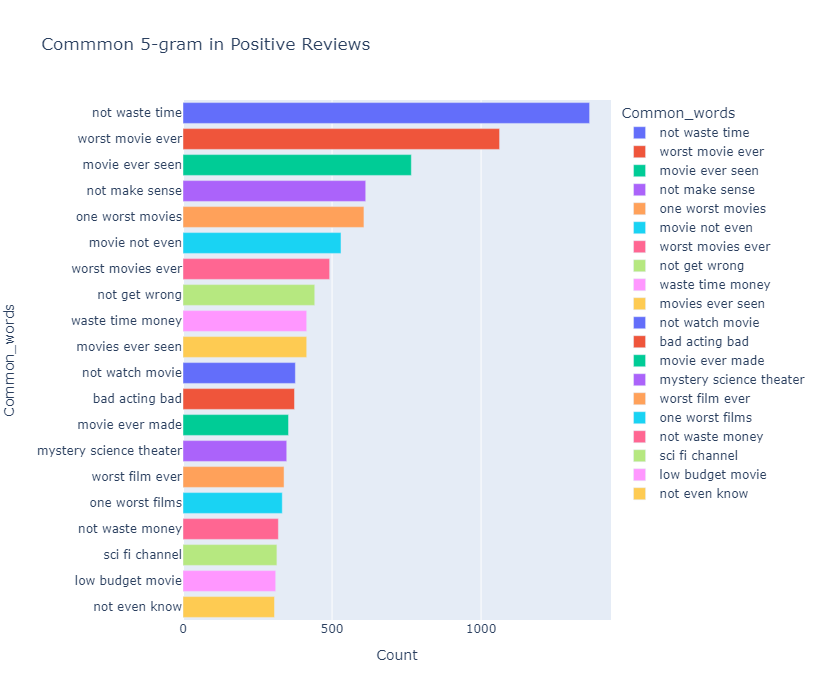

In [63]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### 4. quadgraph

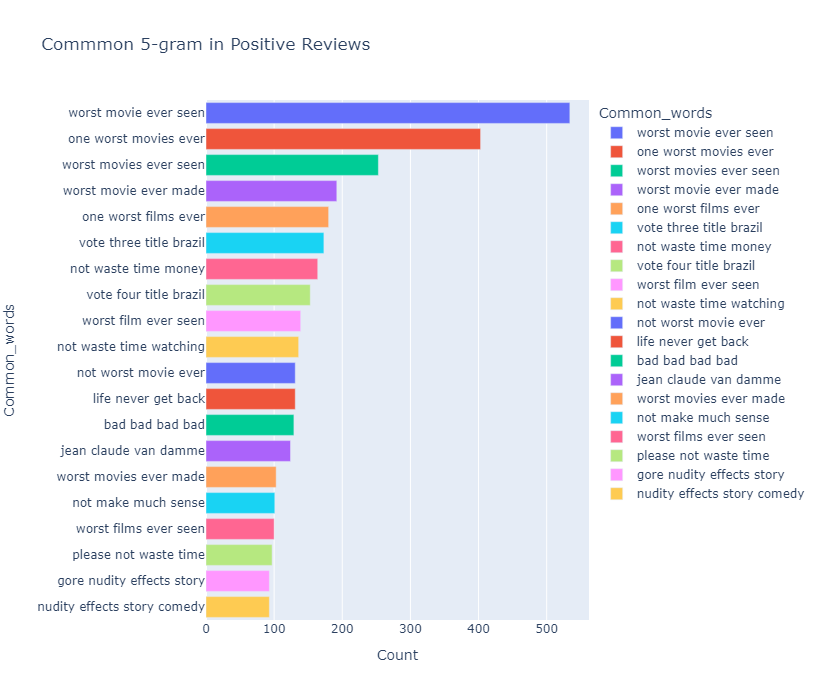

In [64]:
# 4 unigraph
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,4)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

### 5. Fivegram

In [ ]:
# 5 gram
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,5)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [65]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("good|great"))].head()

,Reviews,Ratings,Movies
3,"If you saw the other previous spoof movies by these two horrible gentlemen, then you should know that this already will be bad. I'll tell you the truth, if you want to watch it as a brainless person (ironically meant for the stereotypical teenagers, which I am not) then you will laugh at it a bit. But if you judge it, even a little, the movie automatically fails. Why? Never ask that when it comes to these two men.Remember the good old Hollywood days whenever making a movie was about showing people a type of art, and also a story that kept you on the edge of your seat? Well whenever word hit that making films earned you loads of cash, then all these greedy people came in the picture and its quite pathetic. These two are no exception. We still have movie artists (most notably the genius that is Christopher Nolan). But these two guys just...well I've been writing so big words, let me put it in simple terms for these guys...These guys suck, they are not artists, but instead money cravi...",1.0,Disaster Movie
6,"I was given a free ticket to this film; so I can't complain that I was ripped off (except in that some 90 minutes of my life were irretrievably stolen from me). These sort of movies (Date Movie, Epic Movie, Meet the Spartans) haven't been funny for some time now but ""Disaster Movie"" has reached a new low. There wasn't one real laugh anywhere in the film, and most of the alleged ""jokes"" were actually painful. (There was a considerable amount of childish, mean-spirited stuff in the form of racist, sexist, and especially homophobic, garbage present, along with ample helpings of juvenile gross-outs.) None of the actors were even bothering to put up any pretense of acting. There is nothing hip, clever, or even mildly intelligent going on here. The entire film is from beginning to end crass, vulgar, irrational, and utterly humorless in any human sense. I know that in the past these sort of trash has made enough money to keep Seltzer et al., grinding them out but ""Disaster Movie"" may just...",1.0,Disaster Movie
7,"OK, so ""Disastrous"" isn't an imaginative barb for this movie, but then there's not a shred of wit to the movie, so....I saw this movie for free. A friend who said he ""pissed his pants"" at the trailer had free passes. I think he's incontinent.A spoof of disaster movies might have been fun. This is not it. A couple disaster movies get referenced, not really spoofed. Instead, the ""spoofing"" is of recent movies of all genres, and of aspects of current pop-culture. Then again, how current is women's wrestling or the ""Head On"" commercials?If there's anything about it that's good, there's the 70 minute or so running time (where did they get 90 minutes?) and Nicole Parker seems like she might be good, if she had good material.",1.0,Disaster Movie
11,"I decided to go see this movie with some friends, just to have a laugh. We were hoping that it would be so bad that it would become funny. But it was just awful... I just cant take that kid seriously.Also, this movie just confirmed what we all knew, JB has an ego even bigger then Kayne West. The entire movie was like: ""Look at me, i'm a talented singer and a good person! There is simply nothing that i can't do!""What the movie forgot to mention is that its his mommies fat cigar smoking managers that made JB. he's a puppet. This movie could make him look better, but it just buried him deeper. I'm starting to think that this was done on purpose because the fat cats want to get rid of him.Would not recommend.",1.0,Justin Bieber: Never Say Never
12,"Right so everyone here on IMDb is pretty much committed to giving this ""movie""(if you can call it that) 1 out of 10 to get it to no.1 on the bottom 100 list. Trust me, they're right.I went to see it because I knew there was no way I could criticize this movie without seeing it.However, the film lacks any artistic merit whatsoever. It is full of the latest and greatest pop sensations of the Youtube 